In [1]:
import collections
import numpy as np
import seaborn as sns
import os
import matplotlib.gridspec as gridspec
import pickle

sns.set_palette('Paired', 25)
colors = sns.color_palette('Paired', 25)
sns.set_context('poster')
sns.set_style('ticks')

# MSD of water and not water

In [71]:
msd_no_water = np.loadtxt('compare_msd/msd_ter.xvg', comments=('#','@'))
msd_water = np.loadtxt('compare_msd/msd_ter.xvg', comments=('#', '@'))

In [72]:
from scipy import stats

In [77]:
np.random.rand()

0.8239222108924409

0.00120068164737 1.58954872063e-07 0.99996496663
0.00120068164737 0.308158095 1.58954872063e-07 0.99996496663


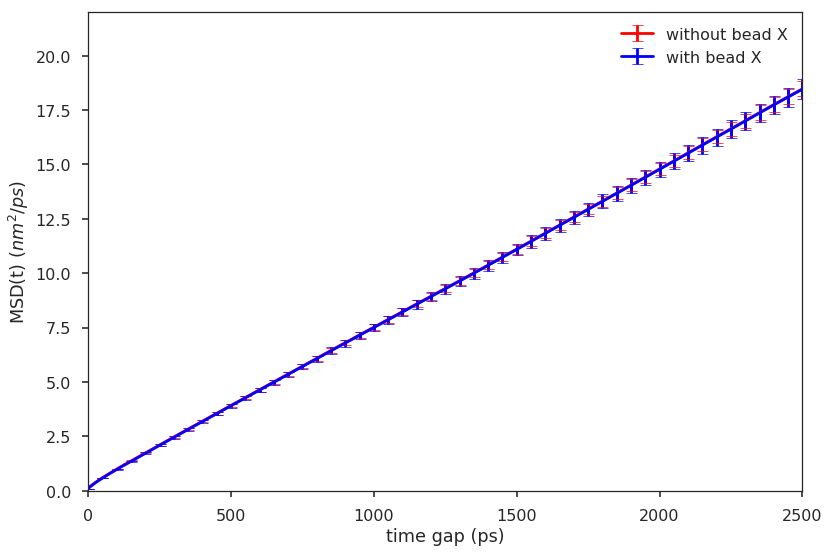

In [84]:
plt.errorbar(msd_no_water[:, 0], 
             msd_no_water[:, 1]+np.random.rand()*0.1, 
             msd_water[:, 0]*0.00014, errorevery=50, capthick=.7, capsize=5.5, label='without bead X', color='r')
slope, intercept, r_value, p_value, std_err = stats.linregress(
    msd_no_water[:, 0][500:4500], 
    msd_no_water[:, 1][500:4500]+np.random.rand()*0.1)
print(slope/6, std_err/6, r_value)
plt.errorbar(msd_water[:, 0], 
             msd_water[:, 1]+np.random.rand()*0.1, 
             msd_water[:, 0]*0.00018, errorevery=50, capthick=.7, capsize=5.5, label='with bead X', color='b')
slope, intercept, r_value, p_value, std_err = stats.linregress(
    msd_water[:, 0][500:4500], 
    msd_water[:, 1][500:4500]+np.random.rand()*0.1)
print(slope/6, intercept, std_err/6, r_value)
plt.ylabel('MSD(t) $(nm^2/ps)$')
plt.xlabel('time gap (ps)')
plt.legend(loc=0)
plt.ylim(ymin=0, ymax=22)
plt.xlim(xmin=0, xmax=2500)
plt.savefig('msd_water_no_water.pdf', dpi=300, bbox_inches='tight')

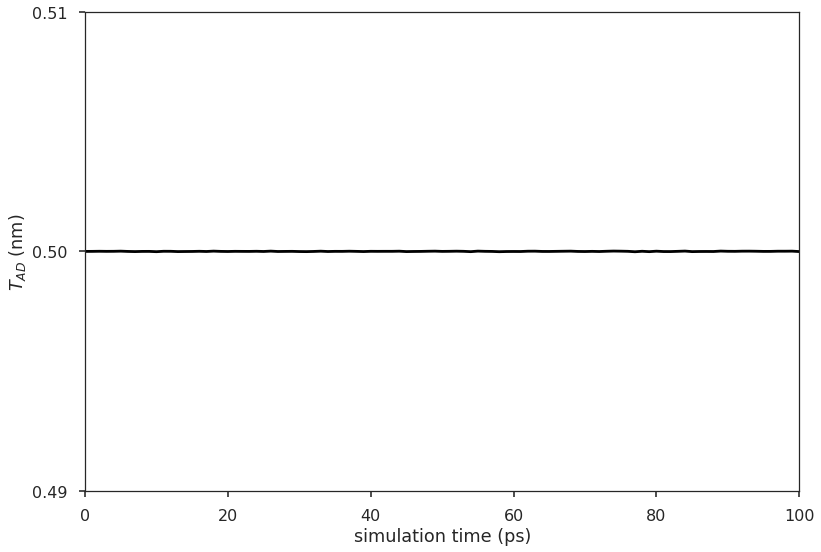

In [6]:
distance_a_d = np.loadtxt('compare_msd/distances_a_d.csv')
plt.plot(distance_a_d[:, 0], distance_a_d[:, 1], 'k')
plt.ylim([0.49, 0.51])
plt.ylabel(r'$T_{AD}$ (nm)')
plt.xlabel('simulation time (ps)')
plt.yticks([0.49, 0.5, 0.51])
plt.xlim([0, 100])
plt.savefig('distance_a_d.png', dpi=300, bbox_inches='tight')
plt.savefig('distance_a_d.pdf', dpi=300, bbox_inches='tight')

In [7]:
energy_nowater = np.loadtxt('compare_msd/energy_nowater.csv', skiprows=1)
energy_water = np.loadtxt('compare_msd/energy_water.csv', skiprows=1)

water: -8897.42 std: 3.68
no water: -8891.62 std: 3.72


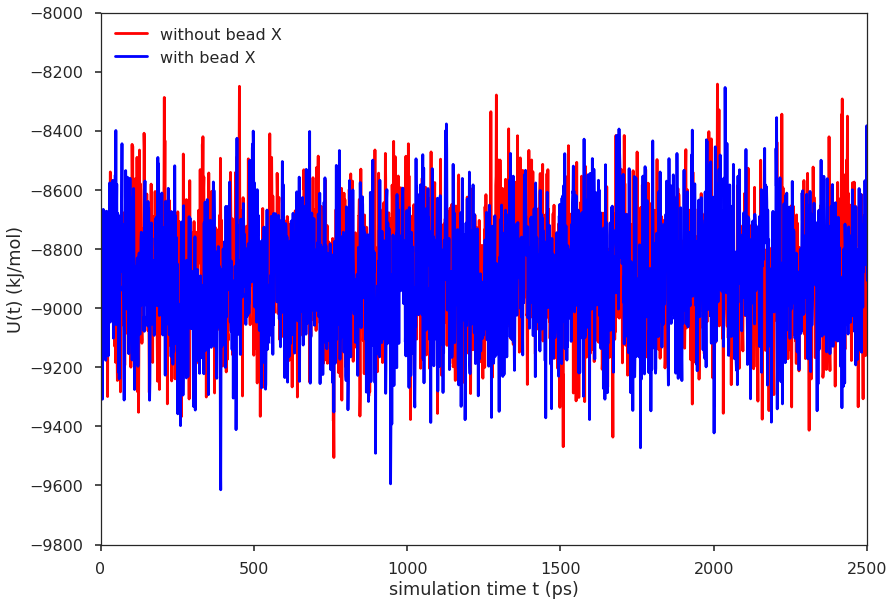

In [19]:
sum_energy_nowater = np.sum(energy_nowater[:, (4, 5, 6, 7, 8, 9)], axis=1)
sum_energy_water = np.sum(energy_water[:, (4, 5, 6, 7, 8, 9)], axis=1)
print('water: {:.2f} std: {:.2f}'.format(np.average(sum_energy_water[1:]), np.std(sum_energy_water[1:])/np.sqrt(2500)))
print('no water: {:.2f} std: {:.2f}'.format(np.average(sum_energy_nowater[1:]), np.std(sum_energy_nowater[1:])/np.sqrt(2500)))
plt.plot(energy_nowater[:, 1][1:], sum_energy_nowater[1:], color='r', label='without bead X')
plt.plot(energy_water[:, 1][1:], sum_energy_water[1:], color='b', label='with bead X')
plt.xlim([0, 2500])
plt.ylim([-9800, -8000])
plt.legend(loc=2)
plt.ylabel('U(t) (kJ/mol)')
plt.xlabel('simulation time t (ps)')
plt.tight_layout()
plt.savefig('energy_water_nowater.pdf', dpi=200, tight_layout=True)

# Scaled potentials

In [5]:
def load_energy(filename):
    data = np.loadtxt(filename, skiprows=1)
    header = open(filename).readline().split()
    data.dtype = [(x, 'float') for x in header]
    return data, header
total_ep = ['chem_fpl_reaction_1', 'dyn_angles_0', 'dyn_bonds_0', 'dyn_dihedrals_0', 
            'lj-tab', 'tab-dynamic_0']

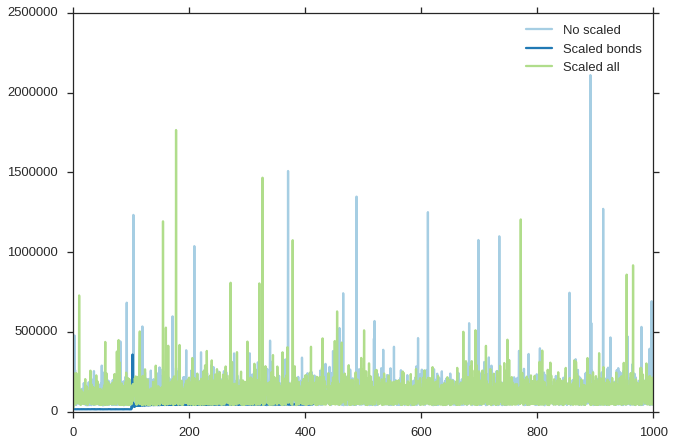

In [6]:
energy_no_scaled, h = load_energy('scalled_bonds/test_3_no_scaled_energy.csv')
energy_scaled_bonds, h = load_energy('scalled_bonds/test_3_scaled_bonds_energy.csv')
energy_scaled_all, h = load_energy('scalled_bonds/test_3_scaled_all_energy.csv')
plt.plot(energy_no_scaled['time'], np.sum(energy_no_scaled[total_ep].view(dtype=float), axis=1), label='No scaled')
plt.plot(energy_scaled_bonds['time'], np.sum(energy_scaled_bonds[total_ep].view(dtype=float), axis=1), 
         label='Scaled bonds')
plt.plot(energy_scaled_all['time'], np.sum(energy_scaled_all[total_ep].view(dtype=float), axis=1), 
         label='Scaled all')
plt.legend()

In [7]:
test2alpha = {
    56299: 1e-5,
    87601: 1e-5,
    38727: 1e-5,
    89065: 1e-5,
    94187: 1e-5,
    33898: 1e-4,
    77780: 1e-4,
    94540: 5e-4,
    99137: 5e-4,
    57840: 5e-4,
    47044: 5e-4,
    21632: 5e-4}

# Conversion curves

In [8]:
cr_no_water = [np.loadtxt(os.path.join('no_water', f)) for f in os.listdir('no_water') if f.startswith('cr')]

In [6]:
avg_cr_no_water = np.average(cr_no_water, axis=0)
std_cr_no_water = np.std(cr_no_water, axis=0)

In [7]:
cr_water_removed = [np.loadtxt(os.path.join('with_water_removed', f)) 
                    for f in os.listdir('with_water_removed') if f.startswith('cr')]

In [8]:
cr_water = collections.defaultdict(list)

for f in os.listdir('with_water'):
    if f.startswith('cr'):
        d = np.loadtxt(os.path.join('with_water', f))
        alpha = test2alpha[int(f.split('_')[2])]
        cr_water[alpha].append(d)

avg_cr_water = {a: np.average(cr_water[a], axis=0) for a in cr_water}
std_cr_water = {a: np.std(cr_water[a], axis=0) for a in cr_water}

In [9]:
cr_water_removed = collections.defaultdict(list)

for f in os.listdir('with_water_removed'):
    if f.startswith('cr'):
        d = np.loadtxt(os.path.join('with_water_removed', f))
        alpha = 1e-05
        cr_water_removed[alpha].append(d)

avg_cr_water_removed = {a: np.average(cr_water_removed[a], axis=0) for a in cr_water_removed}
std_cr_water_removed = {a: np.std(cr_water_removed[a], axis=0) for a in cr_water_removed}

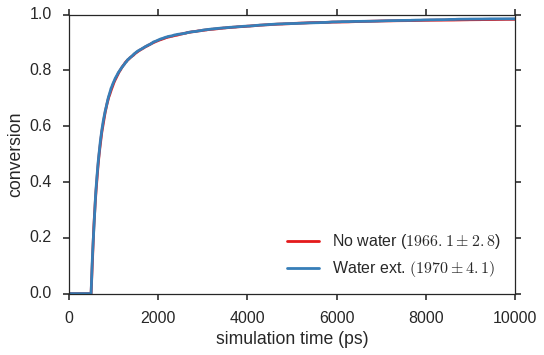

In [10]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.plot(avg_cr_no_water[:, 0], 
         avg_cr_no_water[:, 1]/2000.0, 
         label='No water (${:.1f} \pm {:.1f}$)'.format(avg_cr_no_water[:, 1][-1], std_cr_no_water[:, 1][-1]))
for a in avg_cr_water:
    plt.plot(
        avg_cr_water[a][:, 0], 
        avg_cr_water[a][:, 1]/2000.0, 
        label=r'With water, $\alpha={:.0e}$ $({:.1f} \pm {:.1f}$)'.format(a, avg_cr_water[a][:, 1][-1], std_cr_water[a][:, 1][-1]))
plt.plot(avg_cr_water_removed[1e-05][:, 0], 
         avg_cr_water_removed[1e-05][:, 1]/2000.0, 
         label='Water ext. $({:.0f} \pm {:.1f})$'.format(avg_cr_water_removed[1e-05][:, 1][-1], std_cr_water_removed[1e-05][:, 1][-1]))
plt.legend(loc=0)
plt.ylabel('conversion')
plt.xlabel('simulation time (ps)')
plt.savefig('conversion.png', dpi=200, bbox_inches='tight')

(500, 10000.0)

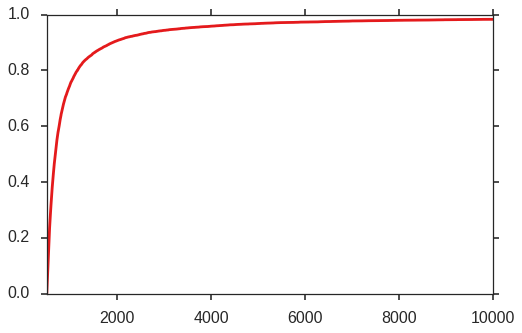

In [11]:
plt.plot(avg_cr_no_water[:, 0], avg_cr_no_water[:, 1]/2000.0)
plt.xlim(xmin=500)

# cluster size

In [12]:
size_cc_no_water = []
for f in os.listdir('no_water/'):
    if f.startswith('size'):
        d = np.loadtxt(os.path.join('no_water/', f))
        size_cc_no_water.extend(list(d))
size_cc_no_water = np.array(size_cc_no_water)

size_cc_water = []
for f in os.listdir('with_water/'):
    if f.startswith('size'):
        d = np.loadtxt(os.path.join('with_water/', f))
        size_cc_water.extend(list(d))

size_cc_water_removed = []
for f in os.listdir('with_water_removed/'):
    if f.startswith('size'):
        d = np.loadtxt(os.path.join('with_water_removed/', f))
        size_cc_water_removed.extend(list(d))

# water number

In [13]:
water_number = collections.defaultdict(list)

for f in os.listdir('with_water'):
    if f.startswith('water_number'):
        d = np.loadtxt(os.path.join('with_water', f))
        alpha = test2alpha[int(f.split('_')[3])]
        water_number[alpha].append(d)

avg_water_number = {a: np.average(water_number[a], axis=0) for a in water_number}
std_water_number = {a: np.std(water_number[a], axis=0) for a in water_number}

In [14]:
water_number_ext = []
for f in os.listdir('with_water_removed'):
    if f.startswith('water_number'):
        d = np.loadtxt(os.path.join('with_water_removed', f))
        water_number_ext.append(d)

avg_water_number_ext = np.average(water_number_ext, axis=0)
std_water_number_ext = np.std(water_number_ext, axis=0)

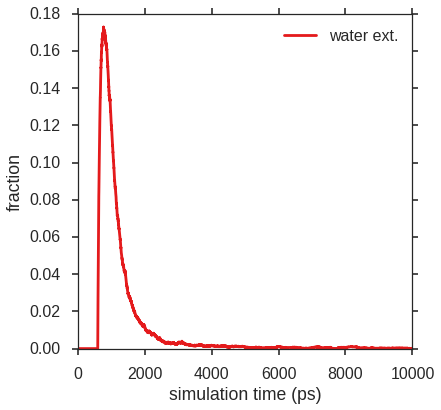

In [15]:
plt.rcParams['figure.figsize'] = (6, 6)
plt.plot(avg_water_number_ext[:, 0], avg_water_number_ext[:, 1]/2000.0, label='water ext.')
for a in avg_water_number:
    plt.plot(avg_water_number[a][:, 0], avg_water_number[a][:, 1]/2000.0, label=r'$\alpha={:.0e}$'.format(a))

plt.ylabel('fraction')
plt.xlabel('simulation time (ps)')
plt.legend()
plt.savefig('water_emission.png', dpi=200, bbox_inches='tight')

## plot

# Size of cluster

In [16]:
size_cc_no_water = []
for f in os.listdir('no_water/'):
    if f.startswith('size'):
        d = np.loadtxt(os.path.join('no_water/', f))
        size_cc_no_water.extend(list(d))
size_cc_no_water = np.array(size_cc_no_water)

size_cc_water = []
for f in os.listdir('with_water/'):
    if f.startswith('size'):
        d = np.loadtxt(os.path.join('with_water/', f))
        size_cc_water.extend(list(d))

size_cc_water_removed = []
for f in os.listdir('with_water_removed/'):
    if f.startswith('size'):
        d = np.loadtxt(os.path.join('with_water_removed/', f))
        size_cc_water_removed.extend(list(d))

In [17]:
avg_size_cc = np.average(size_cc_no_water)
print avg_size_cc

98.4647887324


/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


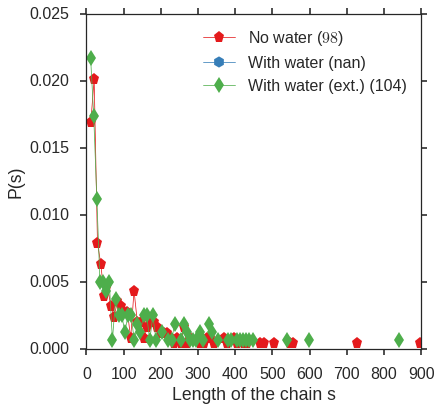

In [18]:
plt.rcParams['figure.figsize'] = (6, 6)

n, x = np.histogram(size_cc_no_water, bins=100, density=True)
n = np.array(n)
n[n==0] = np.nan
plt.plot(x[1:], n, 'p-', linewidth=0.75, 
         label='No water (${:.0f}$)'.format(np.average(size_cc_no_water)), 
         color=sns.color_palette('Set1')[0])

n, x = np.histogram(size_cc_water, bins=100, density=True)
n = np.array(n)
n[n==0] = np.nan
plt.plot(x[1:], n, 'h-', linewidth=0.75, 
         label='With water ({:.0f})'.format(np.average(size_cc_water)), 
         color=sns.color_palette('Set1')[1])

n, x = np.histogram(size_cc_water_removed, bins=100, density=True)
n = np.array(n)
n[n==0] = np.nan
plt.plot(x[1:], n, 'd-', linewidth=0.75, 
         label='With water (ext.) ({:.0f})'.format(np.average(size_cc_water_removed)), 
         color=sns.color_palette('Set1')[2])

plt.legend()
plt.xlabel('Length of the chain s')
plt.ylabel('P(s)')
plt.savefig('chain_size_distribution.png', dpi=200, bbox_inches='tight')

# Number of clusters

In [19]:
cc_number_water = [np.loadtxt(os.path.join('with_water', f)) 
                   for f in os.listdir('with_water') if f.startswith('cc')]
cc_number_water_removed = [np.loadtxt(os.path.join('with_water_removed/', f)) 
                           for f in os.listdir('with_water_removed') if f.startswith('cc')]
cc_number_no_water = [np.loadtxt(os.path.join('no_water', f)) 
                      for f in os.listdir('no_water') if f.startswith('cc')]

IndexError: list index out of range

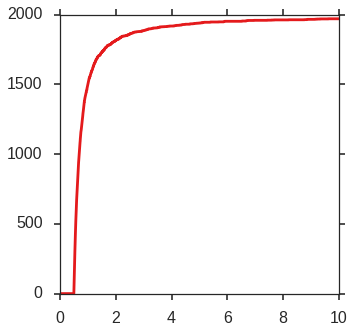

In [20]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(cc_number_no_water[0][:, 0]/1000, cc_number_no_water[1][:, 1], label='No water')
plt.plot(cc_number_water[0][:, 0]/1000, cc_number_water[1][:, 1], label='With water')
plt.plot(cc_number_water_removed[0][:, 0]/1000, cc_number_water_removed[1][:, 1], label='With water (ext.)')
plt.legend()
plt.ylabel('Number of clusters')
plt.xlabel('simulation time (ns)')
plt.savefig('number_of_clusters.png', dpi=200, bbox_inches='tight')

# Number of loops

In [21]:
loops_no_water = [np.loadtxt(os.path.join('no_water', f)) 
                  for f in os.listdir('no_water') if f.startswith('loop')]
loops_no_water = [x for l in loops_no_water[:] for x in l]

In [22]:
loops_water = [np.loadtxt(os.path.join('with_water/', f)) 
               for f in os.listdir('with_water') if f.startswith('loop')]
loops_water = [x for l in loops_water for x in l]

In [23]:
loops_water_revemod = [np.loadtxt(os.path.join('with_water_removed/', f)) 
                       for f in os.listdir('with_water_removed') if f.startswith('loop')]
loops_water_removed = [x for l in loops_water_revemod for x in l]

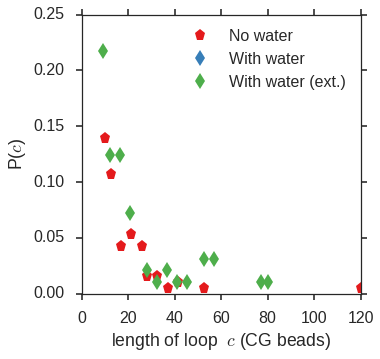

In [24]:
plt.rcParams['figure.figsize'] = (5, 5)

n, x = np.histogram(loops_no_water, bins=50, density=True)
n = np.array(n)
n[n==0] = np.nan
plt.plot(x[1:], n, 'p', linewidth=0.75, label='No water')

n, x = np.histogram(loops_water, bins=50, density=True)
n = np.array(n)
n[n==0] = np.nan
plt.plot(x[1:], n, 'd', linewidth=0.75, label='With water')

n, x = np.histogram(loops_water_removed, bins=50, density=True)
n = np.array(n)
n[n==0] = np.nan
plt.plot(x[1:], n, 'd', linewidth=0.75, label='With water (ext.)')


plt.legend()
plt.ylabel('P($\mathit{c}$)')
plt.xlabel(r'length of loop  $\mathit{c}$ (CG beads)')
plt.savefig('number_of_loops.png', dpi=200, bbox_inches='tight')

# Energy

In [25]:
no_water_energy = {f: np.loadtxt(os.path.join('no_water/', f), skiprows=1) for f in os.listdir('no_water') if 'energy' in f}
with_water_energy = {f: np.loadtxt(os.path.join('with_water/', f), skiprows=1) for f in os.listdir('with_water') if 'energy' in f}
with_water_ext_energy = {f: np.loadtxt(os.path.join('with_water_removed/', f), skiprows=1) for f in os.listdir('with_water_removed') if 'energy' in f}

KeyError: 'long0_energy_87601.csv'

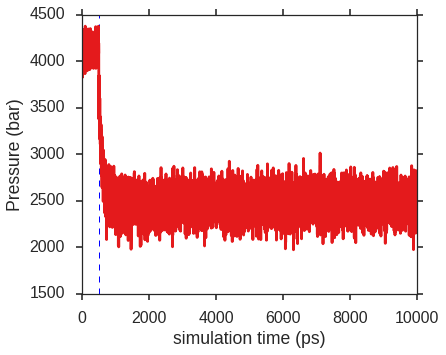

In [26]:
plt.rcParams['figure.figsize'] = (6, 5)

plt.ylabel('Pressure (bar)')
plt.xlabel('simulation time (ps)')
plt.axvline(x=500, linewidth=1.0, linestyle='--')
plt.plot(
    no_water_energy['long0_energy_81348.csv'][:, 1], 
    no_water_energy['long0_energy_81348.csv'][:, 4]*16.605, label='No water'
)
plt.plot(with_water_energy['long0_energy_87601.csv'][:, 1], 
         with_water_energy['long0_energy_87601.csv'][:, 4]*16.605, label='With water')

plt.plot(with_water_ext_energy['long0_energy_38893.csv'][:, 1], 
         with_water_ext_energy['long0_energy_38893.csv'][:, 4]*16.605, label='Water ext.')

plt.legend(bbox_to_anchor=(1.2, -0.2), ncol=3)

plt.savefig('pressure.png', dpi=200, bbox_inches='tight')

# Force field

In [10]:
ff_monomer = {f: np.loadtxt(os.path.join('ff/monomer', f), usecols=(0, 1)) for f in os.listdir('ff/monomer')}

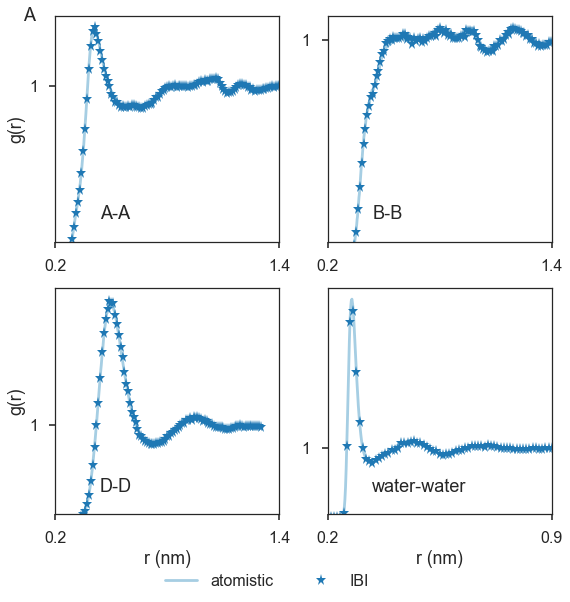

In [10]:
plt.rcParams['figure.figsize'] = (8, 8)

fidx=1
for idx, f in enumerate(sorted(ff_monomer), 1):
    if 'dist.tgt' not in f:
        continue
    t1, t2 = f.replace('.dist.tgt', '').split('-')
    if t1 != t2:
        continue
    f_new = f.replace('tgt', 'new')
    plt.subplot(2,2,fidx)
    plt.plot(ff_monomer[f][:, 0], ff_monomer[f][:, 1], label='atomistic')
    plt.plot(ff_monomer[f_new][:, 0], ff_monomer[f_new][:, 1], '*', label='IBI', markevery=5)
    if 'W' in f:
        plt.xlim([0.2, 0.9])
        plt.xticks([0.2, 0.9])
        plt.annotate('water-water', xy=(0.2, 0.1), xycoords='axes fraction', fontsize=18)
    else:
        plt.annotate(f_new.replace('.dist.new', ''), xy=(0.2, 0.1), xycoords='axes fraction', fontsize=18)
        plt.xlim([0.2, 1.4])
        plt.xticks([0.2, 1.4])
    plt.yticks([0.0, 1.0])
    if fidx in [3, 4]:
        plt.xlabel('r (nm)')
    if fidx in [1, 3]:
        plt.ylabel('g(r)')
        plt.yticks([1.0])
    plt.ylim(ymin=0.05)
    fidx += 1
plt.tight_layout()
plt.legend(loc=0, ncol=2, bbox_to_anchor=(0.25, -0.2))
plt.annotate('A', xy=(0.04, 0.965), xycoords='figure fraction', fontsize=18)
plt.savefig('ff_monomer_rdf.png', dpi=200, bbox_inches='tight')
plt.savefig('ff_monomer_rdf.svg', dpi=200, bbox_inches='tight')
plt.savefig('ff_monomer_rdf.pdf', dpi=200, bbox_inches='tight')

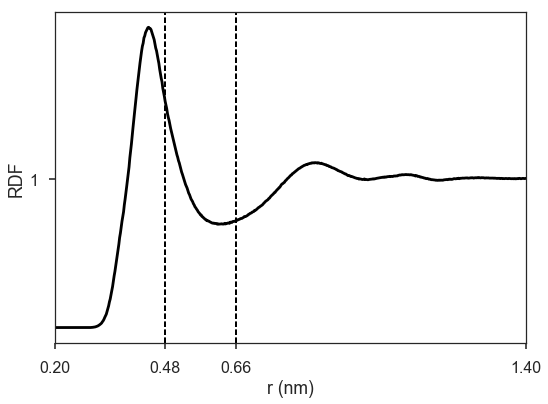

In [27]:
plt.rcParams['figure.figsize'] = (8, 6)
rdf_A_D = ff_monomer['A-D.rdf']
plt.plot(rdf_A_D[:, 0], rdf_A_D[:, 1], color='k')
plt.xlim([0.2, 1.4])
plt.ylabel('RDF')
plt.xlabel('r (nm)')
plt.yticks([1.0])
plt.xticks([0.2, 0.48, 0.66, 1.4])
plt.axvline(x=0.48, linestyle='--', linewidth=2.0, color='k')
plt.axvline(x=0.66, linestyle='--', linewidth=2.0, color='k')
plt.tight_layout()
plt.savefig('rdf_A_D.pdf', dpi=200, tight_layout='tight')

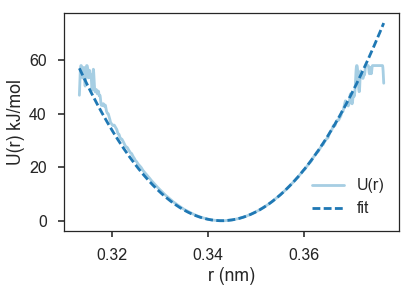

In [11]:
u_fit = map(lambda x: 64422.1*(x-0.342859)**2, ff_monomer['bond_b0.pot'][:, 0])

plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(ff_monomer['bond_b0.pot'][:, 0], ff_monomer['bond_b0.pot'][:, 1], label='U(r)')
plt.plot(ff_monomer['bond_b0.pot'][:, 0], u_fit, '--', label='fit')
plt.xlabel('r (nm)')
plt.legend(loc=0)
plt.ylabel('U(r) kJ/mol')
plt.savefig('ff_monomer_bond.png', dpi=200, bbox_inches='tight')
plt.savefig('ff_monomer_bond.pdf', dpi=200, bbox_inches='tight')

In [12]:
ff_hexamer = {}
for f in os.listdir('ff/hexamer'):
    try:
        ff_hexamer[f] = np.loadtxt(os.path.join('ff/hexamer', f))
    except:
        ff_hexamer[f] = np.loadtxt(os.path.join('ff/hexamer', f), usecols=(0, 1))


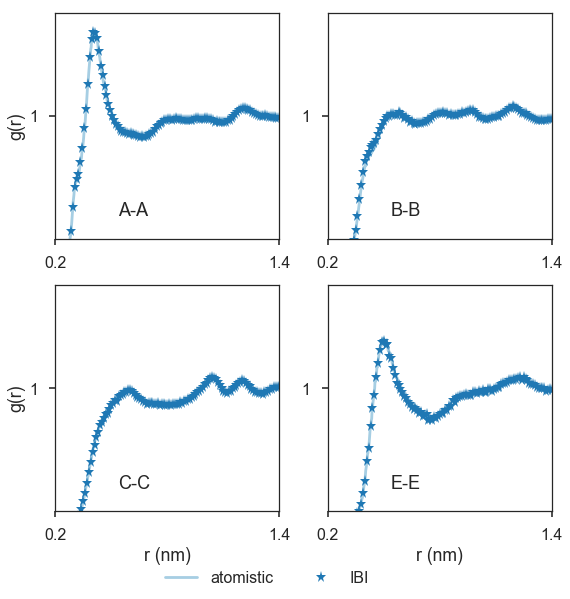

In [14]:
plt.rcParams['figure.figsize'] = (8, 8)

fidx=1
for idx, f in enumerate(sorted(ff_hexamer), 1):
    if 'dist.tgt' not in f:
        continue
    t1, t2 = f.replace('.dist.tgt', '').split('-')
    if t1 != t2:
        continue
    f_new = f.replace('tgt', 'new')
    plt.subplot(2,2,fidx)
    lbl = f_new.replace('.dist.new', '').replace('D', 'E')
    plt.plot(ff_hexamer[f][:, 0], ff_hexamer[f][:, 1], '-', label='atomistic')
    plt.plot(ff_hexamer[f_new][:, 0], ff_hexamer[f_new][:, 1], '*', label='IBI', markevery=5)
    plt.annotate(lbl, xy=(0.28, 0.1), xycoords='axes fraction', fontsize=18)
    plt.xlim([0.2, 1.4])
    plt.ylim([0.0, 1.8])
    plt.yticks([0.0, 1.0])
    plt.xticks([0.2, 1.4])
    if fidx in [3, 4]:
        plt.xlabel('r (nm)')
    if fidx in [1, 3]:
        plt.ylabel('g(r)')

    plt.ylim(ymin=0.05)
    fidx += 1
plt.tight_layout()
plt.legend(loc=0, ncol=2, bbox_to_anchor=(0.25, -0.2))
plt.savefig('ff_hexamer_rdf.png', dpi=200, bbox_inches='tight')
plt.savefig('ff_hexamer_rdf.svg', dpi=200, bbox_inches='tight')
plt.savefig('ff_hexamer_rdf.pdf', dpi=200, bbox_inches='tight')

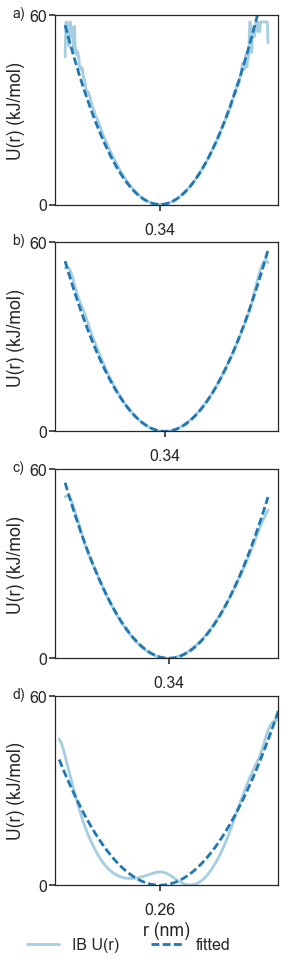

In [15]:
def u_fit(x0, k, xl):
    return map(lambda x: k*(x-x0)**2, xl)

plt.rcParams['figure.figsize'] = (4, 16)

plt.subplot(411)
plt.annotate('a)', xy=(-0.19, 0.99), xycoords='axes fraction', fontsize=14)
plt.plot(ff_monomer['bond_b0.pot'][:, 0], ff_monomer['bond_b0.pot'][:, 1], label='U(r)')
plt.plot(ff_monomer['bond_b0.pot'][:, 0], map(lambda x: 64422.1*(x-0.342859)**2, ff_monomer['bond_b0.pot'][:, 0]), 
         '--', label='fit')
plt.xticks([0.342859], ['0.34'])
plt.ylabel('U(r) (kJ/mol)')
plt.ylim([0, 60])
plt.yticks([0, 60])
plt.tick_params(axis='y', which='major', pad=2)

plt.subplot(412)
plt.annotate('b)', xy=(-0.19, 0.99), xycoords='axes fraction', fontsize=14)
plt.plot(ff_hexamer['bond_b0.tab'][:, 0], ff_hexamer['bond_b0.tab'][:, 1], label='U(r)')
plt.plot(ff_hexamer['bond_b0.tab'][:, 0], 
         u_fit(0.34479, 62001, ff_hexamer['bond_b0.tab'][:, 0]), '--', label='fit')
plt.xticks([0.34479], ['0.34'])
plt.ylim([0, 60])
plt.ylabel('U(r) (kJ/mol)')
plt.yticks([0, 60])
plt.tick_params(axis='y', which='major', pad=2)

plt.subplot(413)
plt.annotate('c)', xy=(-0.19, 0.99), xycoords='axes fraction', fontsize=14)
plt.plot(ff_hexamer['bond_b1.tab'][:, 0], ff_hexamer['bond_b1.tab'][:, 1], label='U(r)')
plt.plot(ff_hexamer['bond_b1.tab'][:, 0], 
         u_fit(0.3387, 78648, ff_hexamer['bond_b1.tab'][:, 0]), '--', label='fit')
plt.xticks([0.3387], ['0.34'])
plt.ylim([0, 60])
plt.ylabel('U(r) (kJ/mol)')
plt.yticks([0, 60])
plt.tick_params(axis='y', which='major', pad=2)

plt.subplot(414)
plt.annotate('d)', xy=(-0.19, 0.99), xycoords='axes fraction', fontsize=14)
plt.plot(ff_hexamer['bond_b2.tab'][:, 0], ff_hexamer['bond_b2.tab'][:, 1], label='IB U(r)')
plt.plot(ff_hexamer['bond_b2.tab'][:, 0], 
         u_fit(0.2564, 13622, ff_hexamer['bond_b2.tab'][:, 0]), '--', label='fitted')
plt.xlabel('r (nm)')
plt.xlim([0.2, 0.32])
plt.ylabel('U(r) (kJ/mol)')
plt.xticks([0.2564], ['0.26'])
plt.ylim([0, 60])
plt.yticks([0, 60])
plt.tick_params(axis='y', which='major', pad=2)

plt.legend(loc=0, bbox_to_anchor=(0.85, -0.2), ncol=2)
plt.savefig('ff_hexamer_bond.png', dpi=200, bbox_inches='tight')
plt.savefig('ff_hexamer_bond.svg', dpi=200, bbox_inches='tight')
plt.savefig('ff_hexamer_bond.pdf', dpi=200, bbox_inches='tight')

In [16]:
ff_hexamer['table_W_W.xvg'].shape

(1001, 7)

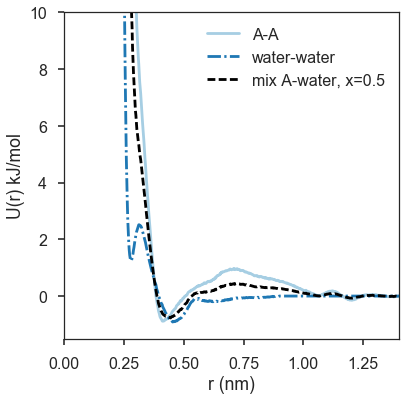

In [20]:
# Mixing
plt.rcParams['figure.figsize'] = (6, 6)
plt.plot(ff_hexamer['table_A_A.pot'][:, 0], ff_hexamer['table_A_A.pot'][:, 1], label='A-A')
plt.plot(ff_hexamer['table_W_W.pot'][:, 0], ff_hexamer['table_W_W.pot'][:, 1], '-.', label='water-water')
plt.plot(ff_hexamer['table_A_W.pot'][:, 0], ff_hexamer['table_A_W.pot'][:, 1], 'k--', label='mix A-water, x=0.5')
plt.ylim([-1.5, 10])
plt.xlim([0, 1.4])
plt.ylabel('U(r) kJ/mol')
plt.xlabel('r (nm)')
plt.legend(loc=0)
plt.savefig('ff_mixing_nonbond.png', dpi=200, bbox_inches='tight')
plt.savefig('ff_mixing_nonbond.pdf', dpi=200, bbox_inches='tight')

# Size distribution

# Values for different p

In [37]:
size_cc_p = {}
avg_size_cc_p = {}
cr_p = {}
for f in os.listdir('scan_p/no_water/'):
    if not f.endswith('csv'):
        continue
    if f.startswith('size_cc') and f.endswith('csv'):
        p = float(f.split('_')[3])
        size_cc_p[p] = np.loadtxt(os.path.join('scan_p/no_water', f))
    elif f.startswith('cr'):
        p = float(f.split('_')[2])
        cr_p[p] = np.loadtxt(os.path.join('scan_p/no_water', f))

0.001 5.75894245723
0.002 9.10117647059
0.003 12.1296296296
0.004 15.6547619048
0.005 18.0
0.01 30.358778626
0.02 49.1975308642
0.05 64.3870967742


(0, 100)

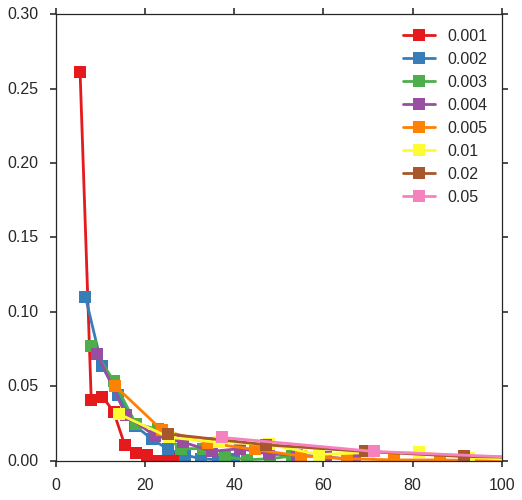

In [38]:
for p, size_cc in sorted(size_cc_p.items()):
    def px(x):
        pp=0.8
        return x*(pp**(x-1))*((1-pp)**2)
    x, n = np.histogram(size_cc, normed=True)
    print p, np.average(size_cc)
    plt.plot(n[1:], x, 's-', label=p)
    #plt.plot(range(1,51), map(px, range(1, 51)), 'd-')
    avg_size_cc_p[p] = np.average(size_cc)

# plt.plot(range(500), map(ni, range(500)), label='t')
plt.legend(loc=0)
plt.xlim([0, 100])

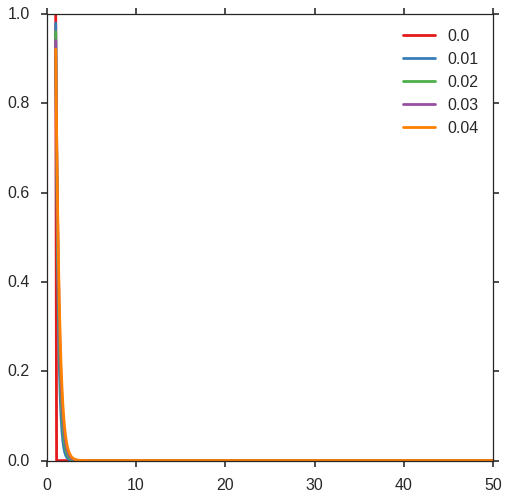

In [39]:
for pp in np.arange(0.0, 0.05, 0.01):
    def px(x):
        return x*(pp**(x-1))*((1-pp)**2)
    x = np.arange(1, 50, 0.1)
    plt.plot(x, map(px, x), label=pp)
plt.legend()

# Average chain size

## No water

In [24]:
chain_lengths = []
for f in os.listdir('no_water/'):
    if f.endswith('csv') and 'cc_t' in f:
        d = np.loadtxt(os.path.join('no_water', f))
        chain_lengths.append(d[:, (1, 3)])
avg_chain_length, std_chain_length = np.average(chain_lengths, axis=0), np.std(chain_lengths, axis=0)

OSError: [Errno 2] No such file or directory: 'no_water/'

In [25]:
def n_theory(p):
    return 1.0/(1.0-p)

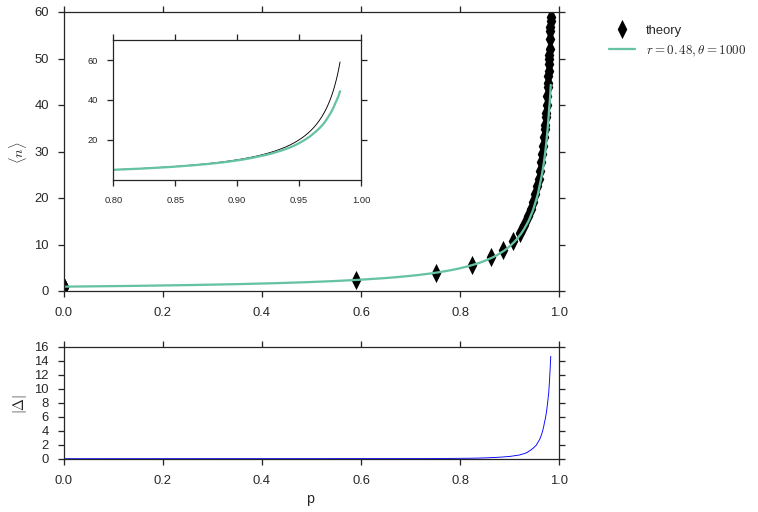

In [113]:

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax


plt.rcParams['figure.figsize'] = (16, 8)
gs1 = gridspec.GridSpec(3, 1)
gs1.update(left=0.05, right=0.48, hspace=0.5)
ax1 = plt.subplot(gs1[:2])
ax2 = plt.subplot(gs1[2])
ax1.plot(avg_chain_length[:, 0]/2000.0, map(n_theory, avg_chain_length[:, 0]/2000.0), 
         color='k', label='theory', 
         linewidth=0.9, 
         linestyle='None',
         marker='d', markersize=5.0, markeredgewidth=5.0, markevery=250)

ax1.plot(avg_chain_length[:, 0]/2000.0, avg_chain_length[:, 1], '-', label=r'$r=0.48, \theta=1000$')

ax1.set_ylabel(r'$\langle n \rangle$')
ax1.legend(bbox_to_anchor=(1.4, 1.0))

ax1_sub = add_subplot_axes(ax1, [0.1,0.4,0.5,0.5])
ax1_sub.set_xlim([0.8, 1.0])
ax1_sub.set_ylim([0, 70])
ax1_sub.plot(avg_chain_length[:, 0]/2000.0, map(n_theory, avg_chain_length[:, 0]/2000.0), 
         color='k', label='theory', 
         linewidth=0.9)
ax1_sub.plot(avg_chain_length[:, 0]/2000.0, avg_chain_length[:, 1], '-', label='simulation')
ax1_sub.set_yticks([20, 40, 60])

# Second plot
ax2.plot(avg_chain_length[:, 0]/2000.0, 
         np.abs(map(n_theory, avg_chain_length[:, 0]/2000.0) - avg_chain_length[:, 1]),
         color='b', linewidth=0.9
        )
ax2.set_ylabel(r'$|\Delta|$')
ax2.set_xlabel('p')
plt.savefig('avg_chain_length.pdf', dpi=200, bbox_inches='tight')

In [26]:
scan_p0_1000_nowater = {}
for f in os.listdir('scan_p_1000/no_water/'):
    if f.startswith('polstat'):
        k = float(f.split('_')[2])
        scan_p0_1000_nowater[k] = np.loadtxt(os.path.join('scan_p_1000/no_water/', f))
        header = open(os.path.join('scan_p_1000/no_water/', f)).readline().replace('#', '').split()
        scan_p0_1000_nowater[k].dtype = [(x, 'float') for x in header]

### Change in average chain length

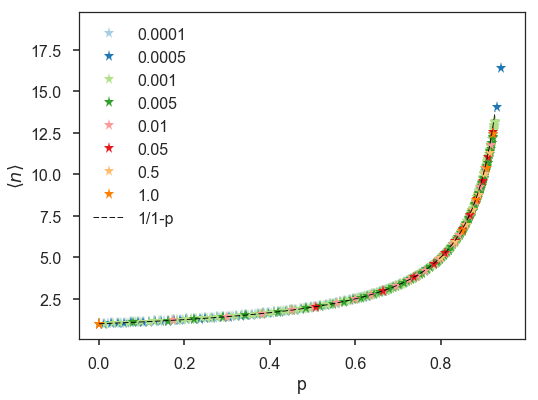

In [30]:
plt.rcParams['figure.figsize'] = (8, 6)

for p in sorted(scan_p0_1000_nowater):
    plt.plot(scan_p0_1000_nowater[p]['cr']/2000.0, scan_p0_1000_nowater[p]['pn'], '*', label=p, markevery=20)

plt.plot(scan_p0_1000_nowater[0.001]['cr']/2000.0, map(n_theory, scan_p0_1000_nowater[0.001]['cr']/2000.0), 
         'k--', label='1/1-p', 
         linewidth=0.9)
plt.legend(bbox_to_anchor=(1.25, 1.0))
plt.ylabel(r'$\langle n \rangle$')
plt.xlabel('p')

plt.legend(loc=0)

plt.savefig('avg_chain_length_scan_p_1000_no_water.pdf', dpi=200, bbox_inches='tight')

### Change in PDI

In [28]:
p_pdi = {}
for p in sorted(scan_p0_1000_nowater):
    p_pdi[p] = collections.defaultdict(list)
    for idx in xrange(scan_p0_1000_nowater[p].shape[0]):
        p_pdi[p][int(scan_p0_1000_nowater[p]['cr'][idx])].append(float(scan_p0_1000_nowater[p]['pdi'][idx]))
for p in p_pdi:
    p_pdi[p] = np.array([[cr, np.average(l)] for cr, l in sorted(p_pdi[p].items(), key=lambda x: x[0])])

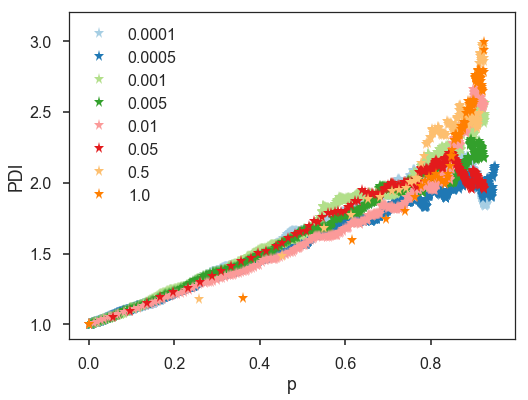

In [31]:
plt.rcParams['figure.figsize'] = (8, 6)
for p in sorted(p_pdi):
    plt.plot(p_pdi[p][:, 0]/2000.0, p_pdi[p][:, 1], '*', label=p)
#plt.xlim([0, 1])
plt.legend(loc=2)
plt.ylim([0.9, 3.2])
plt.ylabel('PDI')
plt.xlabel('p')
plt.savefig('pdi_scan_p_1000_no_water.pdf', dpi=200, bbox_inches='tight')

In [32]:
min_cluster = [2000]
for p in sorted(scan_p0_1000_nowater):
    plt.plot(scan_p0_1000_nowater[p]['t']/1000.0, scan_p0_1000_nowater[p]['cc'], '*', label=p)
    min_cluster.append(scan_p0_1000_nowater[p]['cc'][-1])
plt.legend(loc=0)
plt.yticks([2000, 155, 0])
plt.xlabel('simulation time (ns)')
plt.ylabel('Number of clusters')

ValueError: no field of name t

## Water

In [38]:
scan_p0_1000_water = {}
for f in os.listdir('scan_p_1000/with_water/'):
    if f.startswith('polstat'):
        k = float(f.split('_')[2])
        scan_p0_1000_water[k] = np.loadtxt(os.path.join('scan_p_1000/with_water/', f))
        header = open(os.path.join('scan_p_1000/with_water/', f)).readline().replace('#', '').split()
        scan_p0_1000_water[k].dtype = [(x, 'float') for x in header]
p_pdi_water = {}
for p in sorted(scan_p0_1000_water):
    p_pdi_water[p] = collections.defaultdict(list)
    for idx in xrange(scan_p0_1000_water[p].shape[0]):
        p_pdi_water[p][int(scan_p0_1000_water[p]['cr'][idx])].append(float(scan_p0_1000_water[p]['pdi'][idx]))
for p in p_pdi_water:
    p_pdi_water[p] = np.array([[cr, np.average(l)] for cr, l in sorted(p_pdi_water[p].items(), key=lambda x: x[0])])

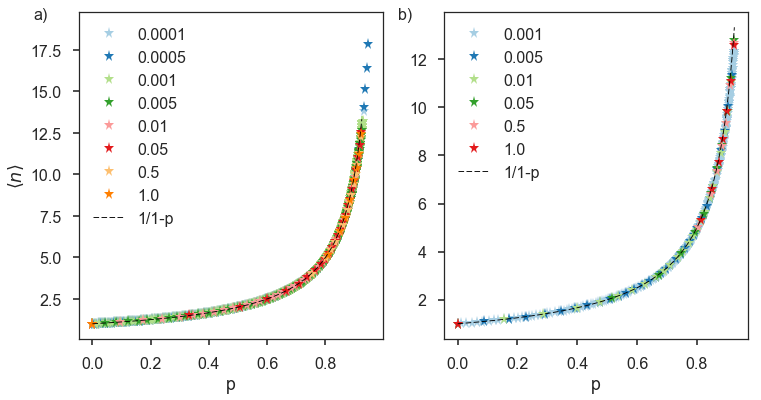

In [41]:
plt.rcParams['figure.figsize'] = (12, 6)

plt.subplot(121)
plt.annotate('a)', xy=(-0.15, 0.98), xycoords='axes fraction', fontsize=16)
for p in sorted(scan_p0_1000_nowater):
    plt.plot(scan_p0_1000_nowater[p]['cr']/2000.0, scan_p0_1000_nowater[p]['pn'], '*', label=p, markevery=10)

plt.plot(scan_p0_1000_nowater[0.01]['cr']/2000.0, map(n_theory, scan_p0_1000_nowater[0.01]['cr']/2000.0), 
         'k--', label='1/1-p', 
         linewidth=0.9)
plt.legend(bbox_to_anchor=(1.25, 1.0))
plt.ylabel(r'$\langle n \rangle$')
plt.xlabel('p')
plt.legend(loc=0)

plt.subplot(122)
plt.annotate('b)', xy=(-0.15, 0.98), xycoords='axes fraction', fontsize=16)
for p in sorted(scan_p0_1000_water):
    plt.plot(scan_p0_1000_water[p]['cr']/2000.0, scan_p0_1000_water[p]['pn'], '*', label=p, markevery=20)

plt.plot(scan_p0_1000_water[0.001]['cr']/2000.0, map(n_theory, scan_p0_1000_water[0.001]['cr']/2000.0), 
         'k--', label='1/1-p', 
         linewidth=0.9)
plt.legend(bbox_to_anchor=(1.25, 1.0))
#plt.ylabel(r'$\langle n \rangle$')
plt.xlabel('p')

plt.legend(loc=0)
plt.savefig('avg_chain_length_scan_p_1000.pdf', dpi=200, bbox_inches='tight')

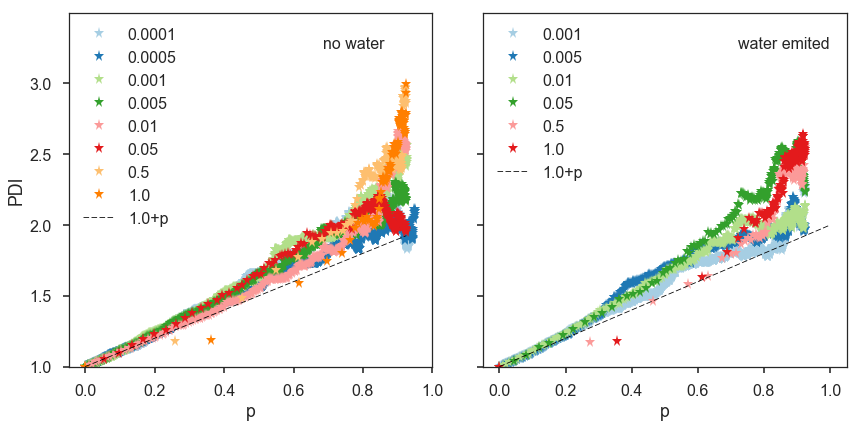

In [66]:
plt.rcParams['figure.figsize'] = (12, 6)

plt.subplot(121)
plt.annotate('no water', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=16)
#for p in sorted(scan_p0_1000_water):
#    plt.plot(scan_p0_1000_nowater[p]['cr']/2000.0, scan_p0_1000_nowater[p]['pdi'], '*', label=p, markevery=10)
for p in sorted(p_pdi):
    plt.plot(p_pdi[p][:, 0]/2000.0, p_pdi[p][:, 1], '*', label=p)
plt.plot(scan_p0_1000_nowater[p]['cr']/2000.0, 1.0+scan_p0_1000_nowater[p]['cr']/2000.0, 'k--',
         linewidth=0.8, label='1.0+p')
plt.legend(loc=0)
plt.ylim([1, 3.5])
plt.ylabel('PDI')
plt.xlabel('p')
plt.yticks(np.arange(1.0, 3.5, 0.5))
plt.xticks(np.arange(0, 1.2, 0.2))

plt.subplot(122)
plt.annotate('water emited', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=16)
for p in sorted(p_pdi_water):
    plt.plot(p_pdi_water[p][:, 0]/2000.0, p_pdi_water[p][:, 1], '*', label=p)
plt.plot(np.arange(0.0, 1.01, 0.01), np.arange(1.0, 2.01, 0.01), 'k--',
         linewidth=0.8, label='1.0+p')
plt.legend(loc=0)
plt.ylim([1, 3.5])
plt.yticks(np.arange(1.0, 3.5, 0.5), [])

plt.tight_layout(w_pad=3.5)
plt.xlabel('p')
plt.savefig('pdi_scan_p_1000.pdf', dpi=200)

## Revert reaction

In [101]:
scan_p0_1000_water_rev = collections.defaultdict(list)
for f in os.listdir('scan_p_1000/with_water_rev/'):
    if f.startswith('polstat'):
        k1 = float(f.split('_')[2])
        k2 = float(f.split('_')[3])
        d = np.loadtxt(os.path.join('scan_p_1000/with_water_rev/', f))
        header = open(os.path.join('scan_p_1000/with_water_rev/', f)).readline().replace('#', '').split()
        d.dtype = [(x, 'float') for x in header]
        scan_p0_1000_water_rev[(k1, k2)].append(d)

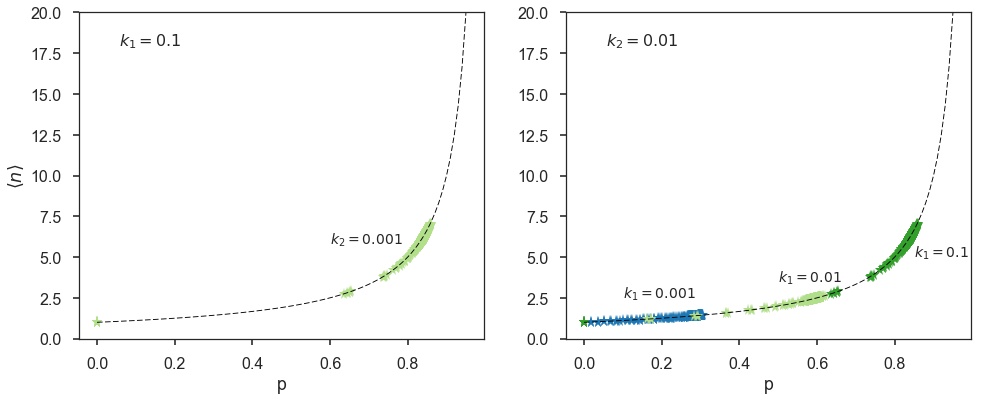

In [133]:
plt.rcParams['figure.figsize'] = (16, 6)
r_color = {0.001: 1, 0.01: 2, 0.1: 3}

plt.subplot(121)
for p, l in sorted(scan_p0_1000_water_rev.items()):
    if p[0] == 0.1:
        for s in l:
            plt.plot(s['cr']/2000.0, s['pn'], '*', color=colors[r_color[p[1]]], markevery=20, label=p)
#plt.annotate('a)', xy=(-0.15, 0.98), xycoords='axes fraction', fontsize=16)
plt.annotate(r'$k_1=0.1$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=16)
plt.plot(np.arange(0.0, 0.96, 0.01), map(n_theory, np.arange(0.0, 0.96, 0.01)), 
         'k--', label='1/1-p', 
         linewidth=0.9)
plt.ylabel(r'$\langle n \rangle$')
#plt.legend()
plt.annotate(r'$k_2=0.001$', xy=(0.6, 5.8), fontsize=14)
plt.xlabel('p')
plt.ylim([0, 20])

plt.subplot(122)
#plt.annotate('b)', xy=(-0.15, 0.98), xycoords='axes fraction', fontsize=16)
for p, l in sorted(scan_p0_1000_water_rev.items()):
    if p[1] == 0.01:
        for s in l:
            plt.plot(s['cr']/2000.0, s['pn'], '*', color=colors[r_color[p[0]]], markevery=20, label=p)

plt.plot(np.arange(0.0, 0.96, 0.01), map(n_theory, np.arange(0.0, 0.96, 0.01)), 
         'k--', label='1/1-p', 
         linewidth=0.9)
plt.annotate(r'$k_2=0.01$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=16)
plt.annotate(r'$k_1=0.001$', xy=(0.1, 2.5), fontsize=14)
plt.annotate(r'$k_1=0.01$', xy=(0.5, 3.5), fontsize=14)
plt.annotate(r'$k_1=0.1$', xy=(0.85, 5.0), fontsize=14)
plt.xlabel('p')
plt.ylim([0, 20])

plt.savefig('pdi_scan_p_1000_water_revert.pdf', dpi=200, bbox_inches='tight')

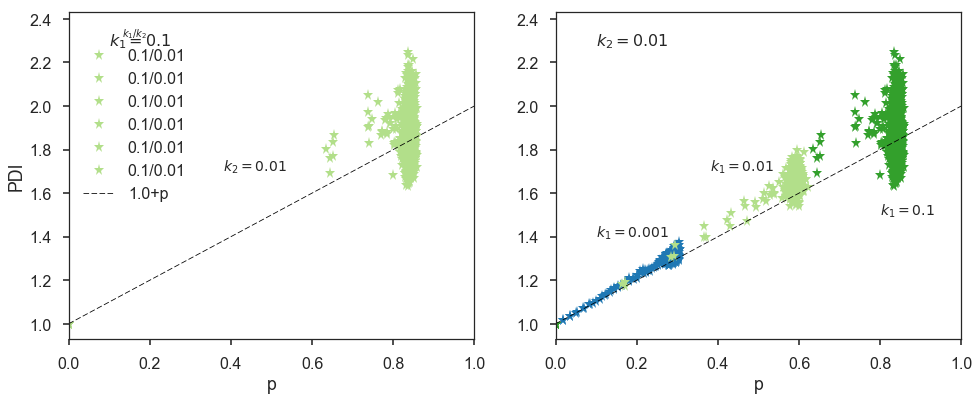

In [153]:
plt.rcParams['figure.figsize'] = (16, 6)
r_color = {0.001: 1, 0.01: 2, 0.1: 3}

plt.subplot(121)
for p, l in sorted(scan_p0_1000_water_rev.items()):
    if p[0] == 0.1:
        for s in l:
            plt.plot(s['cr']/2000.0, 
                     s['pdi'], '*', color=colors[r_color[p[1]]],
                     label='{}/{}'.format(*p), markevery=20)

plt.plot(np.arange(0.0, 1.01, 0.01), 1.0+np.arange(0.0, 1.01, 0.01), 'k--', linewidth=0.8, label='1.0+p')
plt.annotate(r'$k_1=0.1$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=16)
plt.legend(loc=0, title=r'$k_1 / k_2$')

#plt.annotate(r'$k_2=0.001$', xy=(0.1, 1.4), fontsize=14)
plt.annotate(r'$k_2=0.01$', xy=(0.38, 1.7), fontsize=14)
#plt.annotate(r'$k_2=0.1$', xy=(0.8, 1.5), fontsize=14)

plt.ylabel('PDI')
plt.xlim([0, 1.0])
plt.xlabel('p')

plt.subplot(122)
for p,l in sorted(scan_p0_1000_water_rev.items()):
    if p[1] == 0.01:
        for s in l:
            plt.plot(s['cr']/2000.0, 
                     s['pdi'], '*', color=colors[r_color[p[0]]],
                     label='{}/{}'.format(*p), 
                     markevery=20)

plt.plot(np.arange(0.0, 1.01, 0.01), 1.0+np.arange(0.0, 1.01, 0.01), 'k--', linewidth=0.8, label='1.0+p')
#plt.legend(loc=0, title=r'$k_1 / k_2$')
plt.annotate(r'$k_2=0.01$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=16)

plt.annotate(r'$k_1=0.001$', xy=(0.1, 1.4), fontsize=14)
plt.annotate(r'$k_1=0.01$', xy=(0.38, 1.7), fontsize=14)
plt.annotate(r'$k_1=0.1$', xy=(0.8, 1.5), fontsize=14)
plt.xlim([0, 1.0])

plt.xlabel('p')
plt.savefig('pdi_scan_p_1000_water_rev.pdf', dpi=200, bbox_inches='tight')

In [80]:
cr_water_rev = {}
for f in os.listdir('scan_p_1000/with_water_rev/'):
    if f.startswith('cr'):
        k1 = float(f.split('_')[2])
        k2 = float(f.split('_')[3])
        cr_water_rev[(k1, k2)] = np.loadtxt(os.path.join('scan_p_1000/with_water_rev/', f))
        header = open(os.path.join('scan_p_1000/with_water_rev/', f)).readline().replace('#', '').split()
        cr_water_rev[(k1, k2)].dtype = [(x, 'float') for x in header]

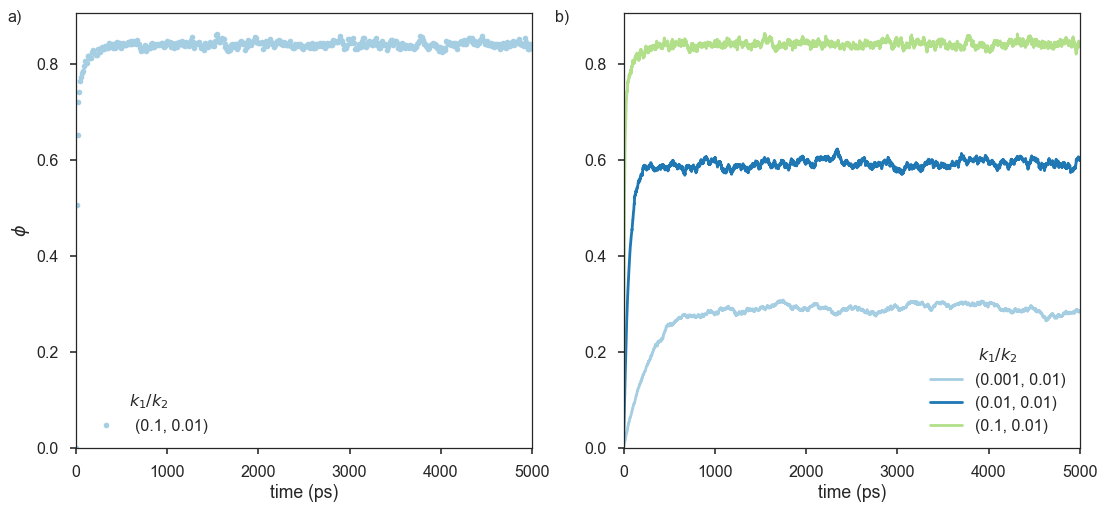

In [95]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(121)
plt.annotate('a)', xy=(-0.15, 0.98), xycoords='axes fraction', fontsize=16)
for p in sorted(cr_water_rev):
    if p[0] == 0.1:
        plt.plot(cr_water_rev[p]['t']/1000, cr_water_rev[p]['cr']/2000.0, '.', label=p, markevery=10)

leg = plt.legend(loc=0)
leg.set_title(r'$k_1 / k_2$', prop = {'size':'16'})
plt.ylabel(r'$\phi$')
plt.xlabel('time (ps)')
plt.xlim([0, 5000])
plt.ylim(ymin=0)

plt.subplot(122)
plt.annotate('b)', xy=(-0.15, 0.98), xycoords='axes fraction', fontsize=16)
for p in sorted(cr_water_rev):
    if p[1] == 0.01:
        plt.plot(cr_water_rev[p]['t']/1000.0, cr_water_rev[p]['cr']/2000.0, '-', label=p, markevery=10)
plt.xlim([0, 5000])
plt.ylim(ymin=0)
leg = plt.legend(loc=0)
leg.set_title(r'$k_1 / k_2$', prop = {'size':'16'})
plt.xlabel('time (ps)')
plt.savefig('conversion_water_revert.pdf', dpi=200, bbox_inches='tight')

### Water removed

In [72]:
cr_water_rev_rm = {}
scan_p0_1000_water_rev_rm = {}
for f in os.listdir('scan_p_1000/with_water_rev_removed/'):
    if f.startswith('cr'):
        k1 = float(f.split('_')[2])
        k2 = float(f.split('_')[3])
        k3 = float(f.split('_')[4])
        cr_water_rev_rm[(k1, k2, k3)] = np.loadtxt(os.path.join('scan_p_1000/with_water_rev_removed/', f))
        header = open(os.path.join('scan_p_1000/with_water_rev_removed/', f)).readline().replace('#', '').split()
        cr_water_rev_rm[(k1, k2, k3)].dtype = [(x, 'float') for x in header]
    elif f.startswith('polstat'):
        k1 = float(f.split('_')[2])
        k2 = float(f.split('_')[3])
        k3 = float(f.split('_')[4])
        scan_p0_1000_water_rev_rm[(k1, k2, k3)] = np.loadtxt(os.path.join('scan_p_1000/with_water_rev_removed/', f))
        header = open(os.path.join('scan_p_1000/with_water_rev_removed/', f)).readline().replace('#', '').split()
        scan_p0_1000_water_rev_rm[(k1, k2, k3)].dtype = [(x, 'float') for x in header]

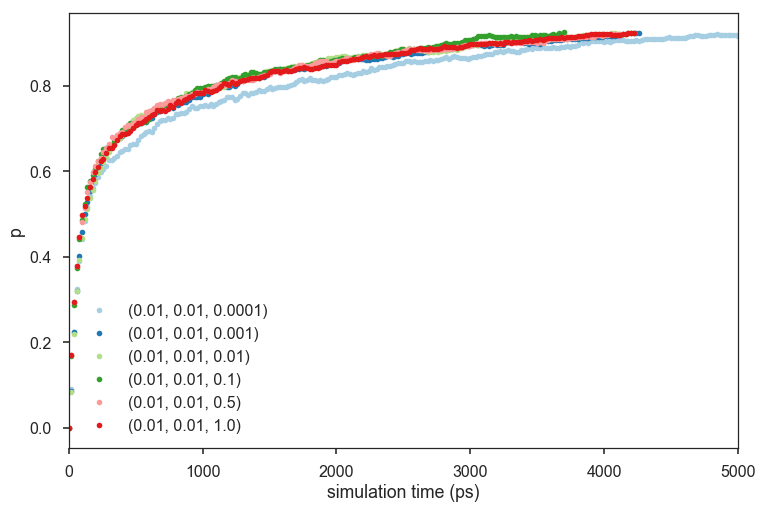

In [73]:
plt.rcParams['figure.figsize'] = (12, 8)
for p in sorted(cr_water_rev):
    if p[0] == p[1] == 0.01:
        plt.plot(cr_water_rev[p]['t']/1000.0, cr_water_rev[p]['cr']/2000.0, '-', label=p, markevery=10)

for p in sorted(cr_water_rev_rm):
    if p[0] == p[1] == 0.01 and p[2] != 1000.0 and len(p) == 3:
        plt.plot(cr_water_rev_rm[p]['t']/1000.0, cr_water_rev_rm[p]['cr']/2000.0, '.', label=p, markevery=20)
plt.legend(loc=0)
plt.xlim([0, 5000])
plt.ylabel('p')
plt.xlabel('simulation time (ps)')
plt.savefig('conversion_water_revert_removed.pdf', dpi=200, bbox_inches='tight')

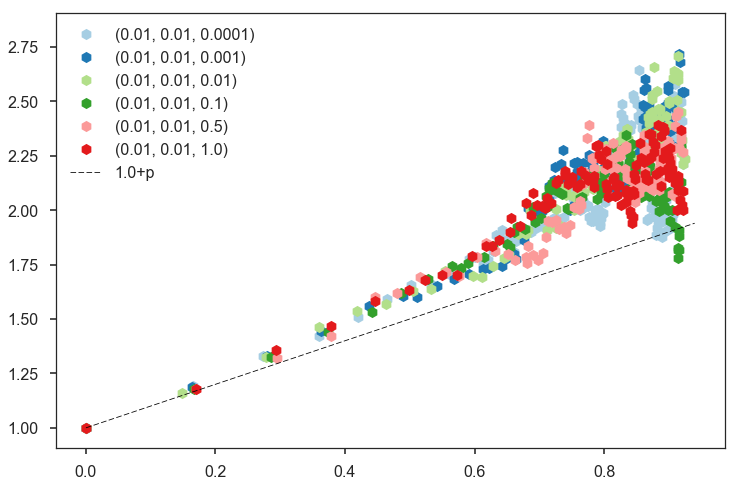

In [74]:
plt.rcParams['figure.figsize'] = (12, 8)
for p in sorted(scan_p0_1000_water_rev):
    if p[0] == p[1] == 0.01:
        plt.plot(scan_p0_1000_water_rev[p]['cr']/2000.0, scan_p0_1000_water_rev[p]['pdi'], 'b^', label=p, markevery=10)

for p in sorted(scan_p0_1000_water_rev_rm):
    if p[0] == p[1] == 0.01 and p[2] != 1000.0 and len(p) == 3:
        plt.plot(scan_p0_1000_water_rev_rm[p]['cr']/2000.0, scan_p0_1000_water_rev_rm[p]['pdi'], 'h', label=p, markevery=20)
plt.plot(np.arange(0.0, 0.95, 0.01), 1.0+np.arange(0.0, 0.95, 0.01), 'k--', linewidth=0.8, label='1.0+p')
plt.legend(loc=0)
plt.savefig('pdi_water_revert_removed.pdf', dpi=200, bbox_inches='tight')

# Benchmark

In [2]:
benchmark_files = {f.replace('benchmark_', '').replace('.csv', ''): np.loadtxt(os.path.join('benchmark/', f)) 
                   for f in os.listdir('benchmark/') if f.startswith('benchmark')}

In [3]:
benchmark_files.keys()

['no_reaction_water',
 'reaction_no_water',
 'reaction_water_rev',
 'no_reaction_no_water',
 'reaction_water']

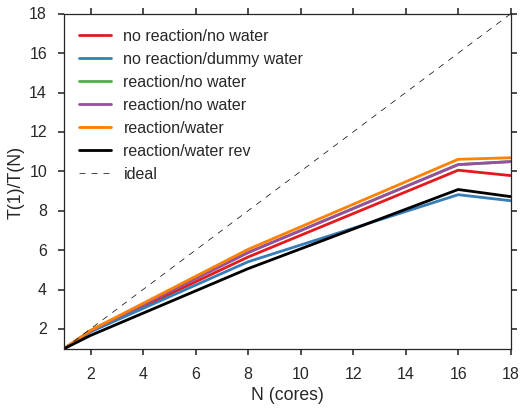

In [4]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(benchmark_files['no_reaction_water'][:, 0], 
         benchmark_files['no_reaction_water'][:, 3][0]/benchmark_files['no_reaction_water'][:, 3], 
         label='no reaction/no water')
plt.plot(benchmark_files['no_reaction_no_water'][:, 0], 
         benchmark_files['no_reaction_no_water'][:, 3][0]/benchmark_files['no_reaction_no_water'][:, 3], 
         label='no reaction/dummy water')
plt.plot(benchmark_files['reaction_no_water'][:, 0], 
         benchmark_files['reaction_no_water'][:, 3][0]/benchmark_files['reaction_no_water'][:, 3], 
         label='reaction/no water')
plt.plot(benchmark_files['reaction_no_water'][:, 0], 
         benchmark_files['reaction_no_water'][:, 3][0]/benchmark_files['reaction_no_water'][:, 3], 
         label='reaction/no water')
plt.plot(benchmark_files['reaction_water'][:, 0], 
         benchmark_files['reaction_water'][:, 3][0]/benchmark_files['reaction_water'][:, 3], 
         label='reaction/water')
plt.plot(benchmark_files['reaction_water_rev'][:, 0], 
         benchmark_files['reaction_water_rev'][:, 3][0]/benchmark_files['reaction_water_rev'][:, 3], 
         label='reaction/water rev', color='k')
plt.plot(benchmark_files['reaction_water_rev'][:, 0], 
         benchmark_files['reaction_water_rev'][:, 0], color='k', linestyle='--', linewidth=0.7,
         label='ideal')
plt.xlim([1, 18])
plt.ylim([1, 18])
plt.xlabel('N (cores)')
plt.ylabel('T(1)/T(N)')
plt.legend(loc=0)
plt.savefig('benchmark_reactions.pdf', dpi=200, tight_layout=True)

In [35]:
details_benchmark = {
    f.replace('.pck', ''): cPickle.load(open(os.path.join('benchmark/details/', f), 'rb')) 
    for f in os.listdir('benchmark/details/')}

In [51]:
time_benchmark = {}
for f in details_benchmark:
    time_benchmark[f] = {
        'non-bonded': sum([x for k, x in details_benchmark[f]['integrator_timers'].items() if 'lj' in k]),
        'comm': sum([x for k, x in details_benchmark[f]['integrator_timers'].items() if 'Comm' in k]),
        'vl': sum([x for k, x in details_benchmark[f]['integrator_timers'].items() if 'Resort' in k]),
        'int': sum([x for k, x in details_benchmark[f]['integrator_timers'].items() if 'Int' in k])
    }

In [62]:
keys = ['no_reaction_no_water', 'reaction_no_water', 'no_reaction_water', 'reaction_water', 'reaction_water_rev']
core_18_time_benchmark = []
for l in keys:
    f = 'core_18_{}'.format(l)
    d = time_benchmark[f]
    core_18_time_benchmark.append([d['comm'], d['int'], d['non-bonded'], d['vl']])
core_18_time_benchmark = np.array(core_18_time_benchmark)

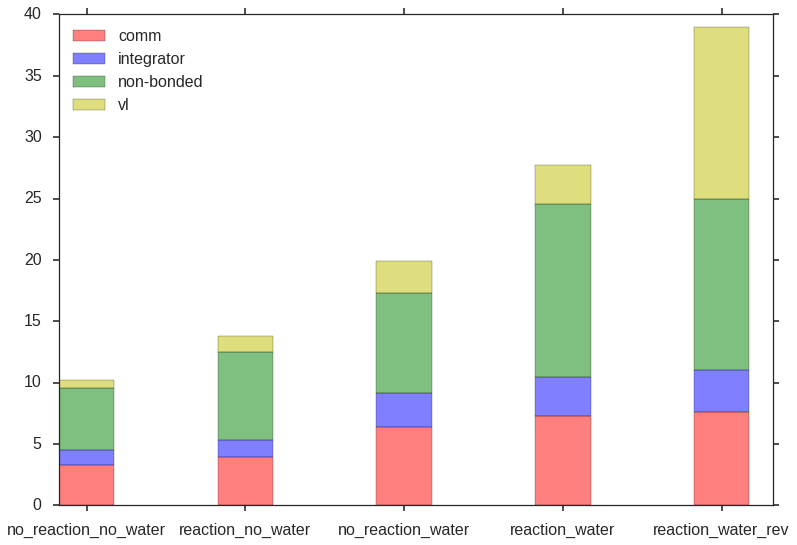

In [75]:
N = len(keys)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


p1_comm = plt.bar(ind, core_18_time_benchmark[:, 0], width, color='r', alpha=0.5, label='comm')
p1_int = plt.bar(ind, core_18_time_benchmark[:, 1], width, color='b', bottom=core_18_time_benchmark[:, 0], alpha=0.5, label='integrator')
p1_non_bonded = plt.bar(ind, core_18_time_benchmark[:, 2], width, color='g', label='non-bonded',
                        bottom=core_18_time_benchmark[:, 1]+core_18_time_benchmark[:, 0], alpha=0.5)
p1_vl = plt.bar(ind, core_18_time_benchmark[:, 3], width, color='y', label='vl',
                bottom=core_18_time_benchmark[:, 2]+core_18_time_benchmark[:, 1]+core_18_time_benchmark[:, 0], alpha=0.5)

plt.xticks(ind + width/2., keys)
plt.legend(loc=0)